# Reseaux de Neurones avec PyTorch

concu pour Python 3.6, matplotlib 2.1.0, pytorch 0.3.0.post4

In [7]:
%matplotlib inline
import torch as t
from torch.autograd import Variable
import numpy as np
import matplotlib.pyplot as plt
from functools import partial

## But du TP

Ce TP se situe dans la suite du TP precedent. Le but de ce TP est de vous faire construire manuellement un petit réseau de neurones, en utilisant les outils bas-niveau de pyTorch.

Dans un premier temps, vous creerez ici un seul neurone avec pyTorch (equivalent a  la regression logistique)
Ensuite, vous connecterez plusieurs neurones pour faire un reseau

## Partie 0 - Quelques fonctions utiles (a ne pas lire. passez a la suite directement)

In [8]:
def visualize_pytorch_classifier(X, y, predict=None,**kwargs):
    X_ = X.data.numpy()
    y_ = y.data.numpy()
    
    ax = plt.gca()
    
    # Plot the training points
    ax.scatter(X_[:, 0], X_[:, 1], c=y_, s=30, cmap='rainbow',
               clim=(y_.min(), y_.max()), zorder=3)
    ax.axis('tight')
    #ax.axis('off')
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    if predict:
        xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                             np.linspace(*ylim, num=200))
        xxyy   = np.c_[xx.ravel(), yy.ravel()]
        Z      = np.array([predict(Variable(t.from_numpy(d)).float(),**kwargs).data.numpy()
                           for d in xxyy]).reshape(xx.shape)

        # Create a color plot with the results
        n_classes = len(np.unique(y.data.numpy()))
        contours = ax.contourf(xx, yy, Z, alpha=0.3,
                               levels=np.arange(n_classes + 1) - 0.5,
                               cmap='rainbow', #clim=(y_.min(), y_.max()),
                               zorder=1)

        ax.set(xlim=xlim, ylim=ylim)




## Partie 1 - construction manuelle d'un seul neurone

Creons d'abord un mini jeu de donnees:

* X sera une matrice de n lignes et 2 colones, tiree au hazard
* pour chaque ligne i, y[i] sera une classe (0 ou 1) selon les coordonnees du point X[i]


In [9]:
n=400

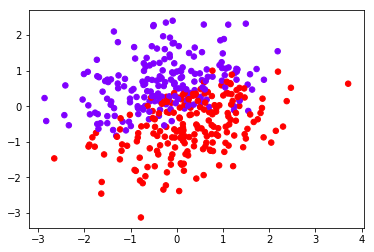

In [10]:
X     = Variable(t.randn(n,2))
noise = Variable(t.randn(n))
y = X[:,0]-2*X[:,1]+noise >0

visualize_pytorch_classifier(X,y)

Ci-dessous, le code necessaire pour faire une regression logistique

In [ ]:
# Voici le code d'une regression logistique
# C'est la meme chose qu'un neurone classique

beta1 = Variable(t.Tensor([0]),requires_grad=True)
beta2 = Variable(t.Tensor([0]),requires_grad=True)

for trials in range(10*n):
    # je choisis un exemple au hasard
    i = np.random.randint(n)

    # je calcule la prediction
    z = beta1*X[i,0]+beta2*X[i,1]
    a = 1/(1+t.exp(-z))

    # je calcule le cout de cette prediction
    if y.data[i] == 1:
        e = -t.log(a)
    else:
        e = -t.log(1-a)

    # je calcule les gradients
    e.backward()

    # je descend le gradient
    beta1.data -= 0.1 * beta1.grad.data
    beta2.data -= 0.1 * beta2.grad.data

    # je remet le gradient a zero
    beta1.grad.data.zero_()
    beta2.grad.data.zero_()

#print("predictions de probabilites = ",g(-(beta0+beta1*X)))
print(beta1,beta2)

#### Exercice:
Dans le code ci-dessus, la combinaison lineaire n'a pas d'intercept `beta0` puisque `z=beta1*X[i,0]+beta2*X[i,1]`
Rajoutez un intercept `beta0` afin qu'on ait `z=beta0+beta1*X[i,0]+beta2*X[i,1]`

Remarque: si on representait notre code sous la forme d'un neurone, ca donnerai ce dessin:

![alt text](un_neurone.png)

#### Exercice:

reorganisez le precedent code en ecrivant trois fonction `predict`,`cout` et `descend_gradient`. Pour cela, vous completerez le code qui suit:


In [ ]:
# Voici le code d'une regression logistique
# C'est la meme chose qu'un neurone classique

beta0 = Variable(t.Tensor([0]),requires_grad=True)
beta1 = Variable(t.Tensor([0]),requires_grad=True)
beta2 = Variable(t.Tensor([0]),requires_grad=True)

def g(z):
    return 1/(1+t.exp(-z))

# fonction qui renvoie la prediction du neurone
def predict(xi,beta0,beta1,beta2):
    # ecrire ici le code manquant
    ...

# fonction qui calcule le cout
def cout(yi,a):
    # ecrire le code manquant
    ...

def descend_gradient(beta0,beta1,beta2):
    # ecrire ici le code manquant
    ...

In [ ]:
for trials in range(10*n):
    # je choisis un exemple au hasard
    i = np.random.randint(n)

    # je calcule la prediction
    a = predict(X[i],beta0,beta1,beta2)

    # je calcule le cout de cette prediction
    e = cout(y.data[i],a)

    # je calcule les gradients
    e.backward()

    # je descend le gradient et je le mets a zero
    descend_gradient(beta0,beta1,beta2)

# affichage graphique du resultat:
visualize_pytorch_classifier(X, y,partial(predict,beta0=beta0,beta1=beta1,beta2=beta2))

## Partie 2 : construction manuelle d'un petit reseau

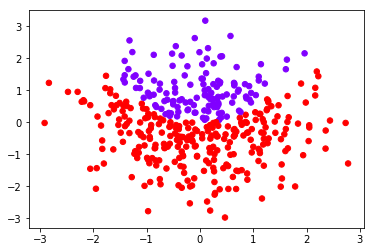

In [11]:
# On va prendre des donnees non separables lineairement:
X = Variable(t.randn(n,2))
y = X[:,0]**2-2*X[:,1]>0

visualize_pytorch_classifier(X,y)

#### exercice:
Implémentez le réseau ci-dessous, qui compte 13 parametres.

* Si possible, pour que l'implémentation soit plus propre, chaque neurone `A,B,C,D` aura sa propre fonction `predictA`,`predictB`,`predictC`...

* De meme, ecrivez une fonction globale `predict` qu'on pourra utiliser pour visualiser le classifieur

* Lancez l'apprentissage sur ces donnees et visualisez le resultat avec `visualize_pytorch_classifier`


Remarque importante: Dans les exercices précédents, les coefficients étaient initialisés à zero. Ici, à cause des symmétries du réseau, faire cela empêcherait le réseau de converger vers un bon modèle. Donc, il vous faudra initialiser les coefficients aleatoirement en faisant par exemple `betaj=Variable(t.rand(1))` pour chaque coefficient `betaj`



![alt text](reseau_de__neurones.png)

#### Exercice:
On souhaite comprendre comment ce réseau fait ses prédictions
* pour chaque neurone de la couche cachée `A,B,C` visualisez sa sortie à tour de role, avec `visualize_pytorch_classifier`
* en examinant les poids du neurone de sortie et à partir des visualisations precedentes, que pouvez-vous conclure sur le fonctionnement du réseau ?

#### Exercice:
* Ecrivez une fonction qui calcule le taux d erreur de votre reseau sur votre jeu de donnees

* Essayez des architectures avec plus de couches et moins de neurones. Qu'obtenez-vous ?